In [28]:
import pandas as pd

In [29]:
import pandas as pd

# Create a small sample dataset
data = {
    'Time': [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000],
    'V1': [0.1, -1.2, 0.3, 0.4, -0.5, 0.6, -0.7, 0.8, -0.9, 1.0],
    'V2': [1.1, -0.2, 0.3, -0.4, 0.5, -0.6, 0.7, -0.8, 0.9, -1.0],
    'V3': [0.5, 0.6, -0.7, 0.8, -0.9, 1.0, -1.1, 1.2, -1.3, 1.4],
    'Amount': [100, 200, 150, 300, 250, 400, 350, 500, 450, 600],
    'Class': [0, 0, 0, 1, 0, 0, 1, 0, 0, 1]  # 1 indicates fraud
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('creditcard.csv', index=False)

print("creditcard.csv file created with sample data.")


creditcard.csv file created with sample data.


In [30]:
data = pd.read_csv('creditcard.csv')

In [31]:
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
    Time   V1   V2   V3  Amount  Class
0      0  0.1  1.1  0.5     100      0
1  10000 -1.2 -0.2  0.6     200      0
2  20000  0.3  0.3 -0.7     150      0
3  30000  0.4 -0.4  0.8     300      1
4  40000 -0.5  0.5 -0.9     250      0


In [32]:
print("\nDataset information:")
print(data.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10 non-null     int64  
 1   V1      10 non-null     float64
 2   V2      10 non-null     float64
 3   V3      10 non-null     float64
 4   Amount  10 non-null     int64  
 5   Class   10 non-null     int64  
dtypes: float64(3), int64(3)
memory usage: 612.0 bytes
None


In [33]:
print("\nClass distribution (0 = legitimate, 1 = fraud):")
print(data['Class'].value_counts())


Class distribution (0 = legitimate, 1 = fraud):
Class
0    7
1    3
Name: count, dtype: int64


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Scale features to have mean=0 and variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80% train, 20% test)
# Stratify to keep the same proportion of fraud cases in train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("\nData preprocessing completed.")
print(f"Training set size: {len(y_train)}")
print(f"Test set size: {len(y_test)}")
print(f"Fraud cases in training set: {sum(y_train==1)}")
print(f"Fraud cases in test set: {sum(y_test==1)}")



Data preprocessing completed.
Training set size: 8
Test set size: 2
Fraud cases in training set: 2
Fraud cases in test set: 1


In [35]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier with 100 trees
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

print("\nModel training completed.")



Model training completed.



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Confusion Matrix:
[[0 1]
 [1 0]]
ROC AUC Score: 0.0000


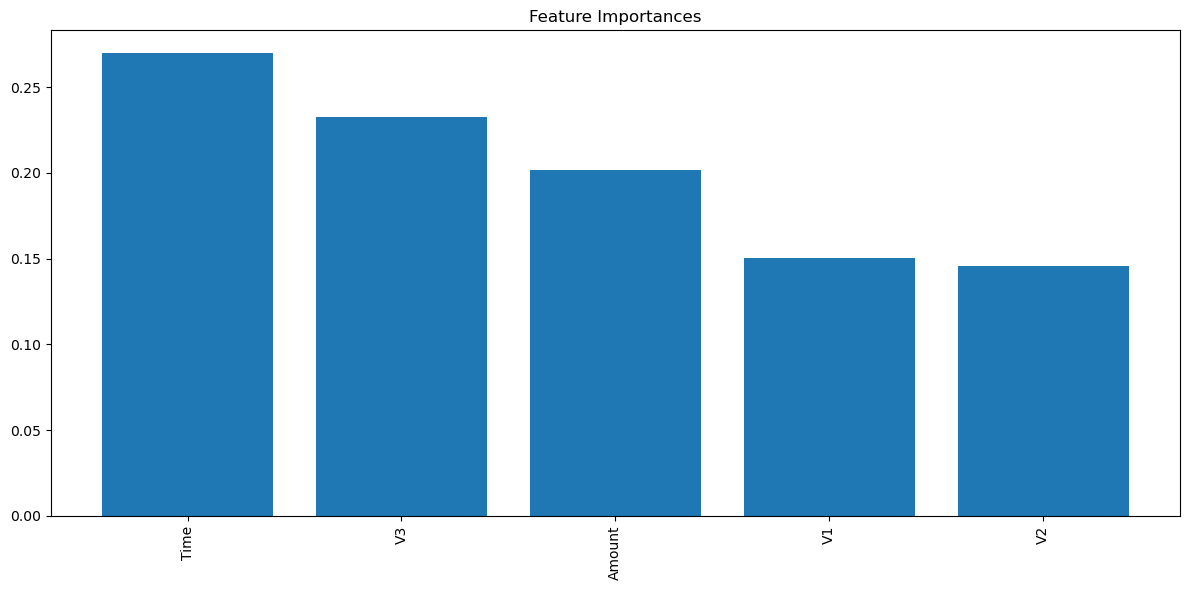

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (fraud)

# Print classification report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate and print ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot feature importance
feature_names = data.columns.drop('Class')
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


In [37]:
def predict_fraud(new_transaction):
    """
    Predict if a new transaction is fraudulent.
    
    Parameters:
    new_transaction (list or array): Feature values in the same order as training data
    
    Returns:
    tuple: (is_fraud (bool), fraud_probability (float))
    """
    # Scale the input features using the previously fitted scaler
    new_transaction_scaled = scaler.transform([new_transaction])
    
    # Predict fraud probability
    fraud_prob = model.predict_proba(new_transaction_scaled)[0][1]
    
    # Define threshold for fraud detection (can be tuned)
    threshold = 0.5
    is_fraud = fraud_prob > threshold
    
    return is_fraud, fraud_prob

# Example usage with the first transaction from the dataset
sample_transaction = X.iloc[0].values
fraud_flag, probability = predict_fraud(sample_transaction)
print(f"\nSample transaction prediction: {'Fraud' if fraud_flag else 'Legitimate'}, Probability: {probability:.4f}")



Sample transaction prediction: Legitimate, Probability: 0.0500


E:\Python\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [41]:
# Instead of selecting one row:
# sample_transaction = X.iloc[0].values

# Use the entire dataset features as a NumPy array or DataFrame
all_transactions = X  # keep as DataFrame to preserve column names

# Scale all transactions
all_transactions_scaled = scaler.transform(all_transactions)

# Predict fraud for all transactions
predictions = model.predict(all_transactions_scaled)
probabilities = model.predict_proba(all_transactions_scaled)[:, 1]

# Example: print first 5 predictions and probabilities
for i in range(5):
    print(f"Transaction {i}: Predicted class = {predictions[i]}, Fraud probability = {probabilities[i]:.4f}")


Transaction 0: Predicted class = 0, Fraud probability = 0.0500
Transaction 1: Predicted class = 0, Fraud probability = 0.0600
Transaction 2: Predicted class = 0, Fraud probability = 0.0300
Transaction 3: Predicted class = 0, Fraud probability = 0.0400
Transaction 4: Predicted class = 0, Fraud probability = 0.1300
